# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Первая лабораторная работа </center>
# <center> Кирилл Зосимов </center>

В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python. Разбересь в том, как работает свертка, и примените пару интересных фильтров.

# Задание 1. Работа с аудиофайлами в Python (1 балл)

## Теория

Звук - это аналоговый сигнал. То есть он является непрерывным по времени и по значениям. Для того, чтобы работать со звуком на цифровом устройстве, надо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбраные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала. 

<!-- 
## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла? 

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?   

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg? -->


<!-- ### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib. -->

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

### 1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

In [ ]:
# В .wav файле хранится заголовок с информацией о файле (кодировка, кол-во каналов, размер, частота дискретизации, байт рейт и так далее)
# Область данных содержит последовательно расположенные амплитуды, из которых создаётся звук при воспроизведении
# В стерео обычно амплитуды на разные каналы идут друг за другом
# Параметры дискретизации и квантования можно узнать из заголовка:
# 24-27 байты - частота, 20-21 байты - формат аудио (определяется тип квантования)

### 2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?

**Подсказка**

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib.

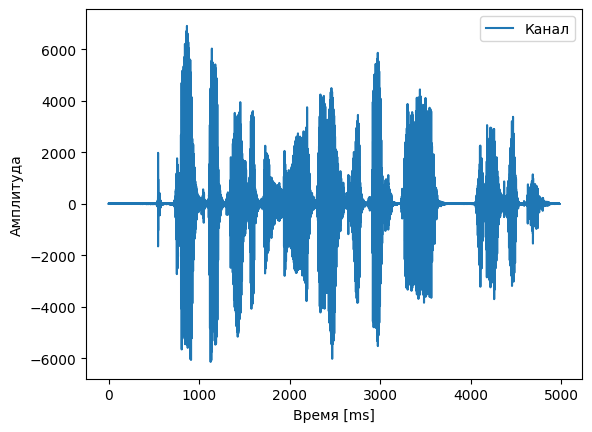

16333.333333333332


In [6]:
from scipy.io import wavfile
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import IPython

samplerate, data = scipy.io.wavfile.read("DSP_1.wav")

# График
length = data.shape[0] / samplerate * 1000
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data[:, 1], label="Канал")
plt.legend()
plt.xlabel("Время [ms]")
plt.ylabel("Амплитуда")
plt.show()

# Воспроизведение с различной частотой:
IPython.display.Audio(data=data[:, 1], rate=samplerate * 1.5)
# Верхняя частота, начиная с которой голос невозможно разобрать (трудно различить слова уже для samplerate * 2.5):
# ~130000
IPython.display.Audio(data=data[:, 1], rate=samplerate * 3)
# Нижняя частота, начиная с которой голос невозможно разобрать (трудно различить слова уже для samplerate / 2.5):
# ~16333
IPython.display.Audio(data=data[:, 1], rate=samplerate / 2.7)
print(samplerate / 2.7)

### 3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?

In [7]:
# Формат .wav предназначен для цифровой записи звука и имеет фиксированный высокий битрейт порядка 1400 Кбит / сек
# Форматы .mp3 и .ogg имеют более низкий битрейт, соответственно, и более низкое качество звука, однако, благодаря сжатию
# файлы в этих формах имеют меньший размер, чем .wav файлы

# Задание 2. Гармонические сигналы (1 балл)

## Теория
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) -  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону. 

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $А$ - это амплитуда, $\omega$ – циклическая частота (радиан/с), $\varphi$ - фаза (сдвиг), $t$ – время. 


In [8]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(14, 14)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    plt.yticks(np.arange((data.min().round())//10*10, 
                         (data.max().round())//10*10+10, step=5))
    plt.grid(which='major',
        color = 'k', 
        linewidth = 1)
    plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
    plt.show()

In [10]:
# Читаем данные с подготовленными сигналами
import pickle
with open("data.pickle", "rb") as f:
    test_data = pickle.load(f)
# Теперь можно приступать к практике!

## Практика

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

### Сигнал ***a***

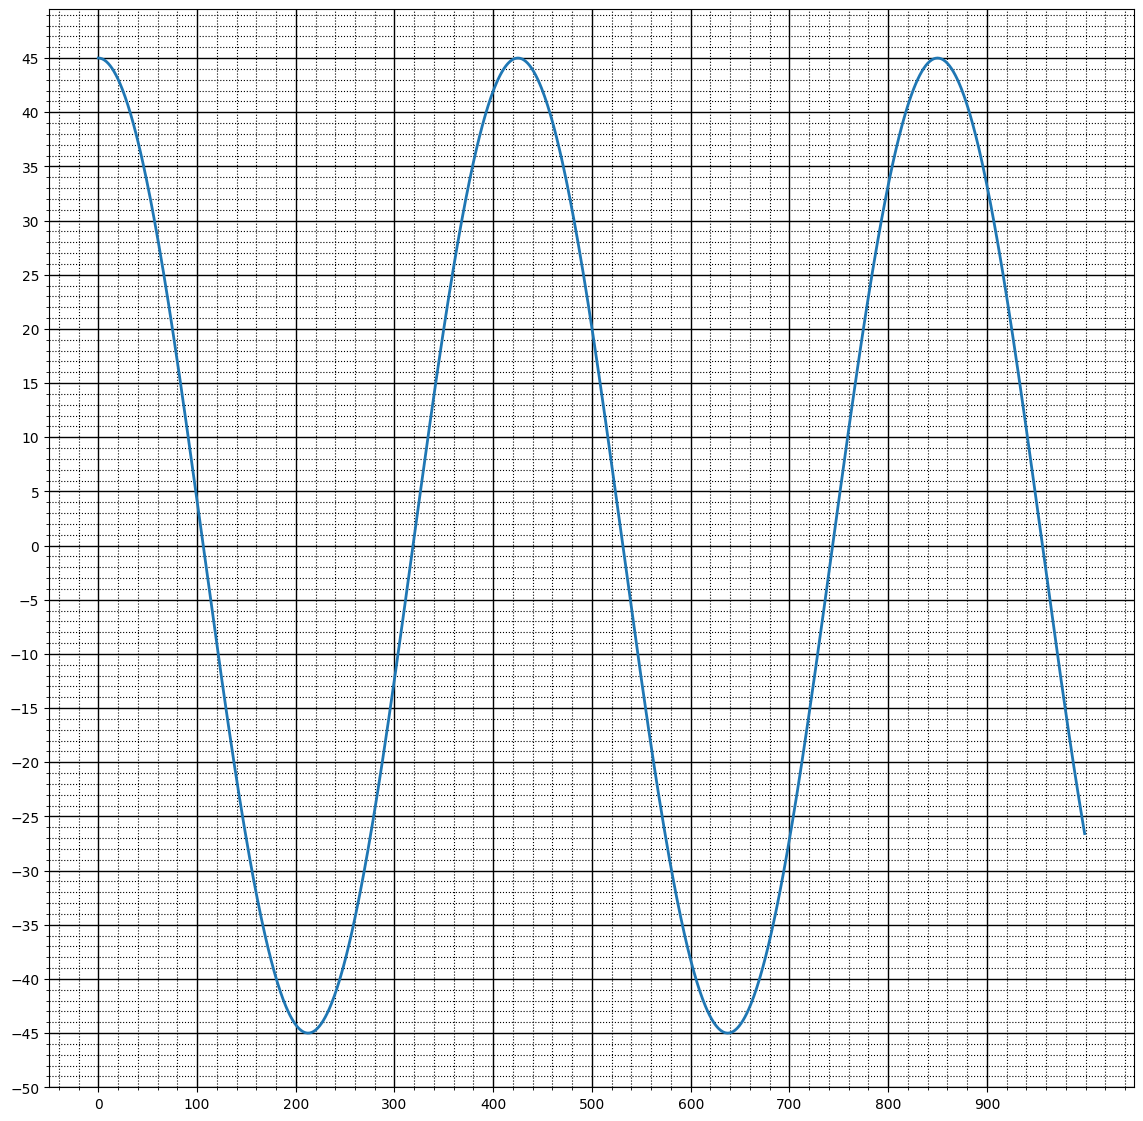

In [11]:
draw_signal(test_data['task2']['a'])

In [67]:
import numpy as np
import math

A = 45
T = 425
w = 2 * math.pi / T
al = 0

a = np.arange(0, 1000)
a = np.multiply(a, w)
a = np.add(a, al)
a = np.cos(a)
a = np.multiply(a, A)

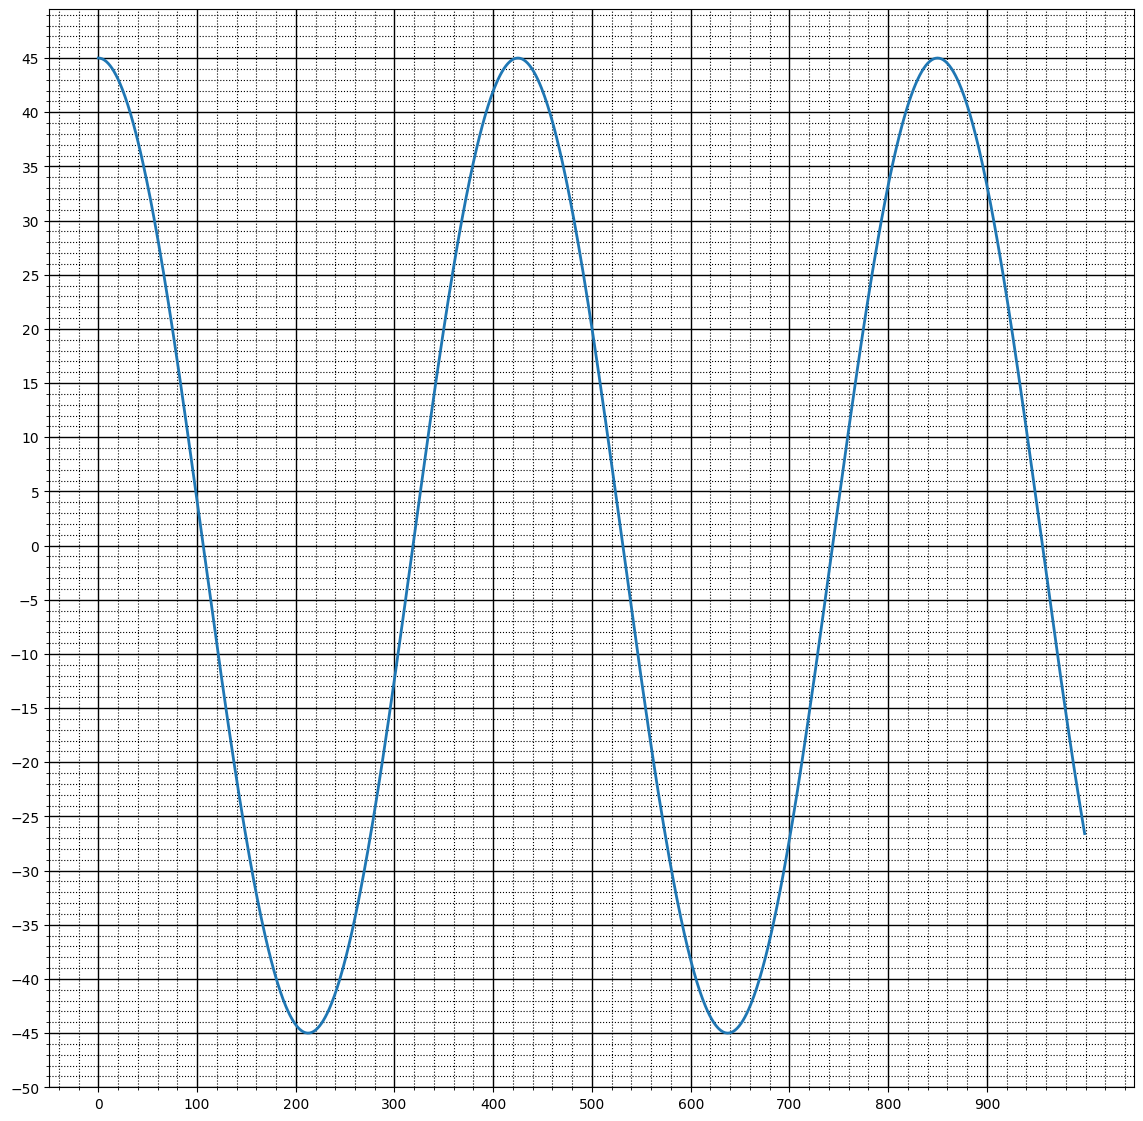

In [68]:
draw_signal(a)

In [72]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'a':**

1. Амплитуда - $A= 45$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = 0.01478396542865785
$

3. Фаза - $\phi= 0$

### Сигнал ***b***

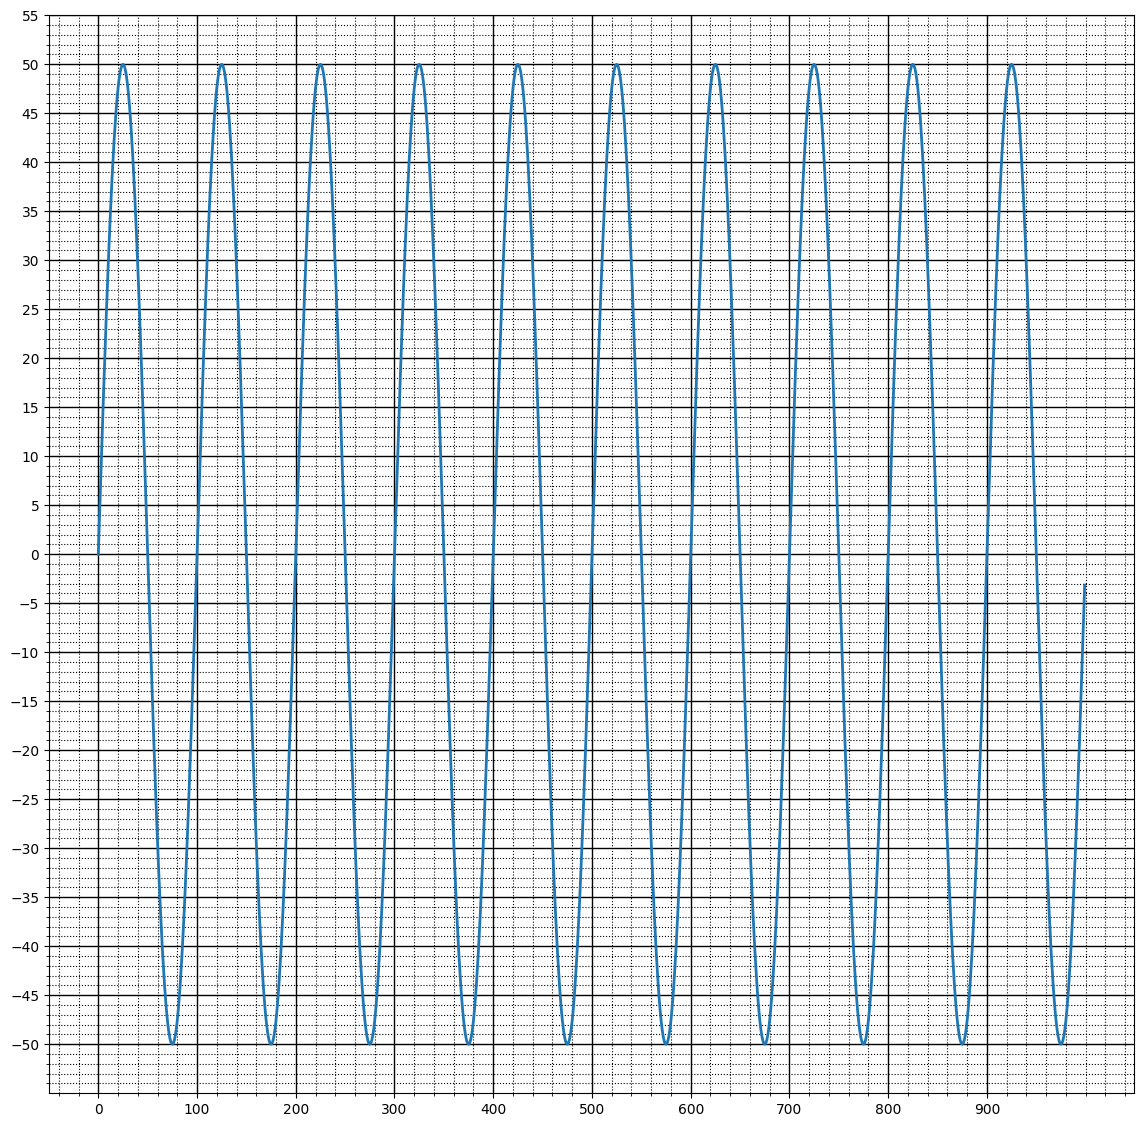

In [73]:
draw_signal(test_data['task2']['b'])

In [80]:
import numpy as np
import math

A = 50
T = 100
w = 2 * math.pi / T
al = 11

b = np.arange(0, 1000)
b = np.multiply(b, w)
b = np.add(b, al)
b = np.cos(b)
b = np.multiply(b, A)


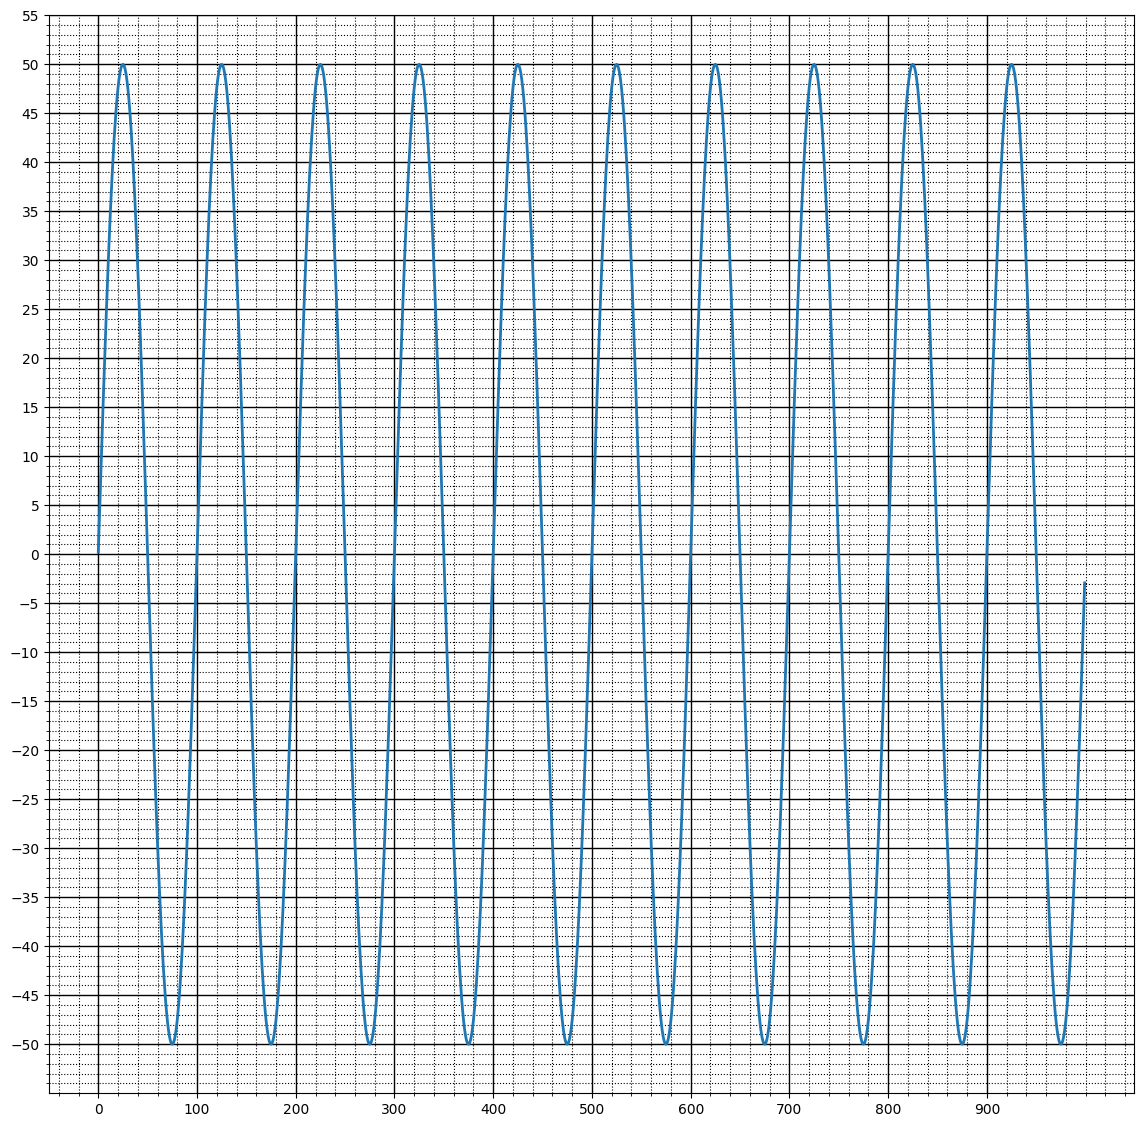

In [81]:
draw_signal(b)

In [84]:
assert len(b)== 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'b':**

1. Амплитуда - $A= 50$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = 0.06283185307179587$

3. Фаза - $\phi= 11$

### Сигнал ***c***

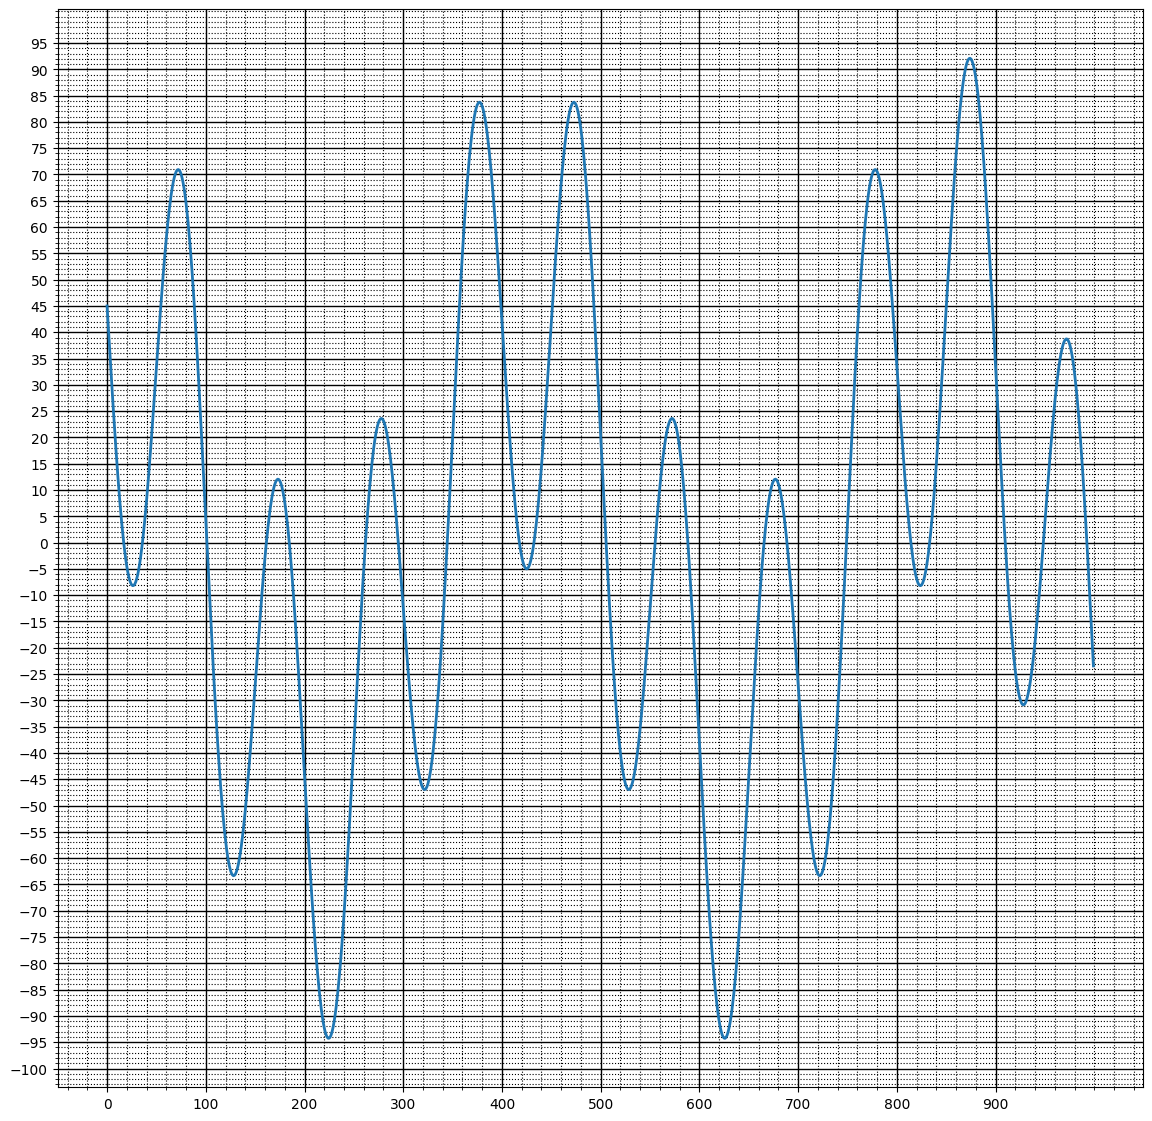

In [85]:
draw_signal(test_data['task2']['c'])

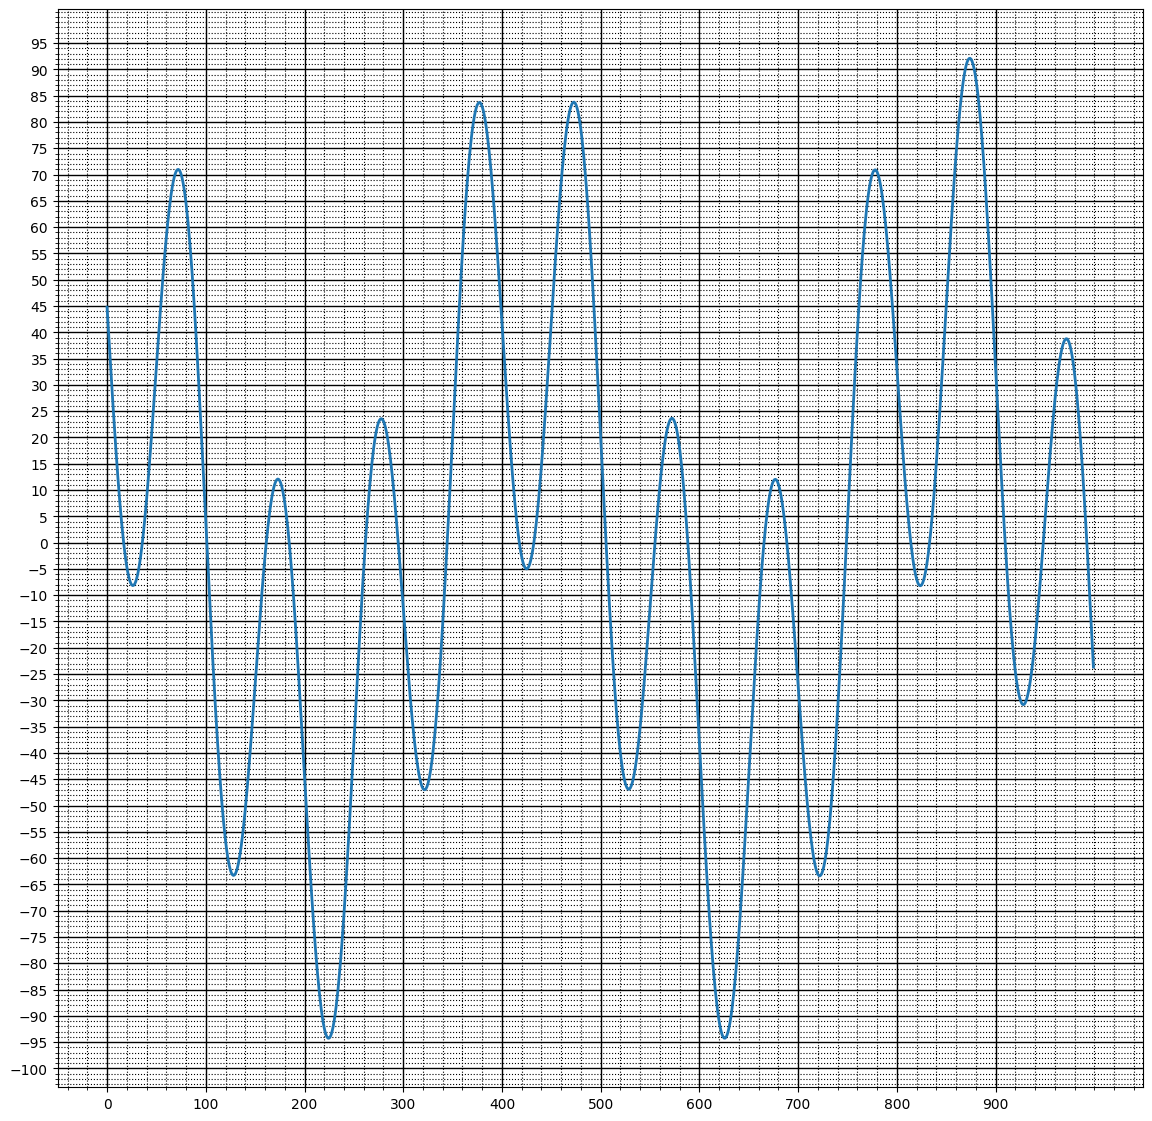

In [97]:
# сигнал состоит из двух гармоник
import numpy as np
import math

A_1 = 45
T_1 = 425
w_1 = 2 * math.pi / T_1
al_1 = 0

q_1 = np.multiply(np.cos(np.add(np.multiply(np.arange(0, 1000), w_1), al_1)), A_1)

A_2 = -50
T_2 = 100
w_2 = 2 * math.pi / T_2
al_2 = 11
q_2 = np.multiply(np.cos(np.add(np.multiply(np.arange(0, 1000), w_2), al_2)), A_2)

c = np.add(q_1, q_2)

draw_signal(c)

In [98]:
assert len(c)== 1000
assert np.allclose(c, test_data["task2"]["c"], atol=1)
print("Ok!")

# c получилось разностью a и b

Ok!


# Задание 3. Свертка (3 балла)

## Теория
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с ее помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям f и g и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.  Другими словами, преобразование свёртки однозначно определяет выходной сигнал y(t) для установленного значения входного сигнала x(t) при известном значении функции импульсного отклика системы h(t).

<!-- ![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution") -->
![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution")

Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t-τ)dτ$$
где $\tau$  - длительность импульсной переходной характеристики.

## Практика
Реализуйте операцию свёртки. Сравните её с существующей реализацией scipy.signal.convolve. Постройте графики фильтра, исходного сигнала и результата свертки.

In [120]:
def convolve(in1, in2):
    mx = len(in2) + len(in1) - 1
    res = []
    for i in range(0, mx):
        c = 0
        for k in range(0, len(in1)):
            if (k < len(in1) and (i - k) < len(in2) and i >= k):
                c += in1[k]*in2[i - k]
        res.append(c)
    return np.array(res)

In [121]:
import scipy.signal

def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = scipy.signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [131]:
a = np.repeat([0,1,0], 10)
b = np.array([0,1,2,3,2,1,0])

In [132]:
test_convolve(a, b, print_debug=False)

Ok!


### Нарисуйте результат свертки a и b

Сигнал **а**

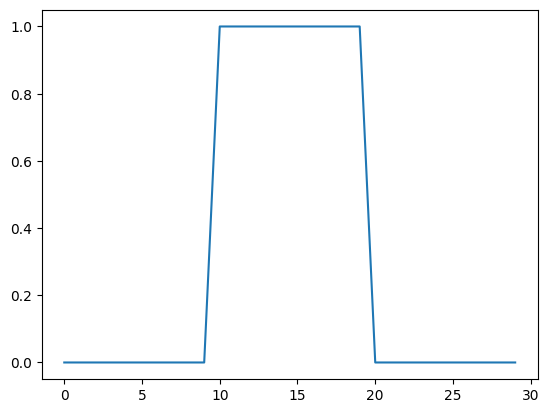

In [124]:
plt.plot(a)
plt.show()

Сигнал **b**

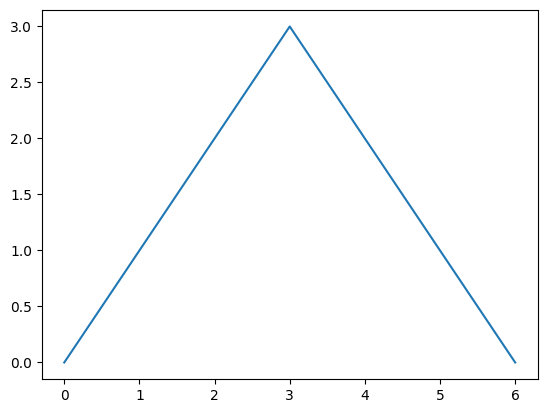

In [125]:
plt.plot(b)
plt.show()

Свертка **a** и **b**

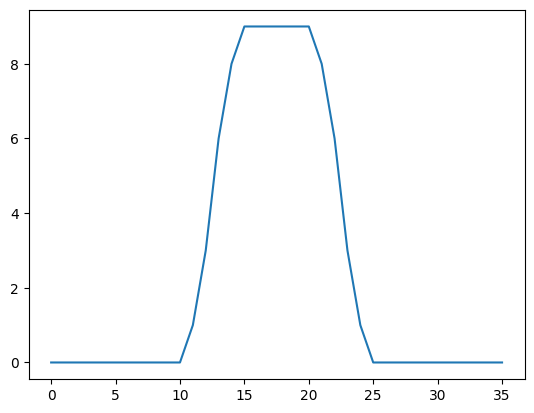

In [126]:
conv = convolve(a, b)
plt.plot(conv)
plt.show()

Все 3 графика на одной картинке:

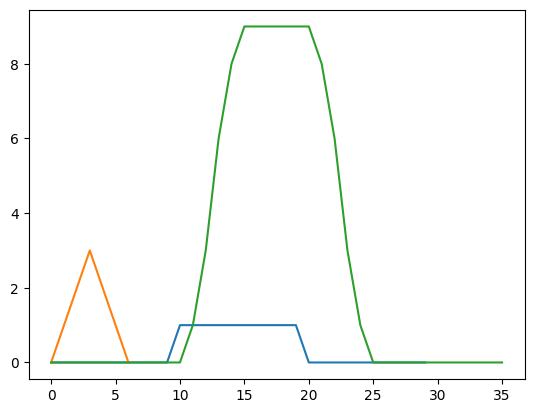

In [130]:
import matplotlib.pyplot as plt

plt.plot(a)
plt.plot(b)
plt.plot(conv)
plt.show()

# Задание 4. * Алгоритм Карплуса-Стронга 

Реализуйте  [Алгоритм Карплуса-Стронга](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis). В качестве фильтра используйте усреднитель двух смежных отсчетов. Проверьте результат. 

Отрисуйте и воспроизведите полученный сигнал. На что влияют параметры генерации? Попробуйте имитировать звучание разных струн гитары.

In [ ]:
def karplus_strong(noise, N):
    # Noise - input
    # N - number of samples to generate
    # return y - generated signal based on Noise 
    # YOUR CODE HERE

   

    raise NotImplementedError()

In [ ]:
np.random.seed(seed=1)
sample_rate = 44100 
frequency = 82.41
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
assert np.allclose(gen_wav[:len(noise)], noise), "Generated signal must starting with noise"
assert np.allclose(gen_wav[len(noise)], (noise[0])/2), "Out of range samples eq 0."
assert np.allclose(gen_wav[len(noise)+1: 2*len(noise)], (noise[:-1] + noise[1:])/2), \
    "Bad requrent rule( 1 iteration)"
assert np.allclose(gen_wav[2*len(noise)], (noise[0]/2 + noise[-1])/2), \
    "Bad requrent rule( 2 iteration)"
assert np.allclose(gen_wav[2*len(noise)+2: 3*len(noise)], \
                   (((noise[:-1] + noise[1:])/2)[:-1] + ((noise[:-1] + noise[1:])/2)[1:])/2), \
    "Bad requrent rule( 3 iteration)"
print('All Ok!')

### Попробуем покрутить параметры генерации

Сгенерируем гитарные ноты:

In [ ]:
# YOUR CODE HERE

Визуализируем затухание амплитуды:

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len+1, gen_len), gen_wav)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

Визуализируйте затухание амплитуд гитарных нот:

In [ ]:
# YOUR CODE HERE